# How To Pronounce GIF?
***
## Stack Overflow Developers Survey 2017

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/0/02/Stack_Overflow_logo.svg/2000px-Stack_Overflow_logo.svg.png'>

## Table of Contents
***
* [1. Introduction](#introduction) <br>
* [2. Importing dataset](#importing_dataset) <br>
* [3. Important questions](#important_questions) <br>
   * [3.1. How do you pronounce "GIF"?](#gif) <br>
   * [3.2. Tabs or spaces?](#tabs_or_spaces) <br>
   * [3.3. Clicky, clicky?](#clicky) <br>
   <br>
* [4. Less important questions](#less_important_questions) <br>
   * [4.1. What is the most popular programming language?](#programming_language) <br>

## 1. Introduction
<a id="introduction"></a>

Every year, Stack Overflow conducts a massive survey of people on the site, covering all sorts of information like programming languages, salary, code style and various other information. In this notebook I will try to thoroughly analyze the results obtained this year in search of information about a statistical programmer. <b>BUT</b> in the first place, however, let's answer some important questions that divie developers for years, like: "Tabs or spaces?", "Is it ok to use mechanical keyboard with loud clicky keys at office?" and most importantly "How To Pronounce GIF?" Let's dive in, my friends!

## 2. Importing dataset
<a id="importing_dataset"></a>

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [2]:
# Importing the dataset
dataset = pd.read_csv('../00_Datasets/StackOverflow/StackOverflow.csv', header = 0)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Columns: 154 entries, Respondent to ExpectedSalary
dtypes: float64(6), int64(1), object(147)
memory usage: 60.4+ MB


<b>NOTE:</b> As you can see the data set contains over 150 columns and 51k rows. After a short analysis I decided to focus on the questions that interested me the most. Let's create a list with column names for these questions:

In [14]:
interesting_columns = [
    'Professional',
    'Country',
    'EmploymentStatus',
    'HomeRemote',
    'DeveloperType',
    'YearsProgram',
    'JobSatisfaction',
    'PronounceGIF',
    'ClickyKeys',
    'TabsSpaces',
    'EducationTypes',
    'HaveWorkedLanguage', 
    'WantWorkLanguage',
    'HaveWorkedFramework',
    'WantWorkFramework',
    'IDE',
    'VersionControl'
]
data = pd.DataFrame(dataset, columns=interesting_columns)

## 3. Important questions
<a id="important_questions"></a>

### 3.1. How do you pronounce "GIF"?
<a id="gif"></a>

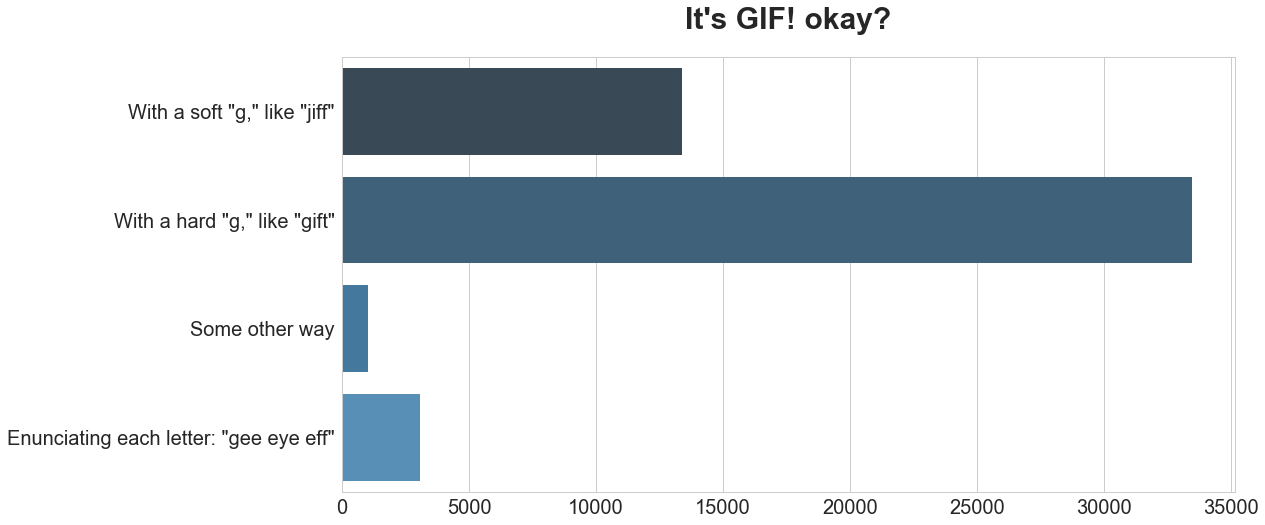

In [110]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title("It's GIF! okay?", fontsize=30, fontweight='bold', y=1.05,)
sns.countplot(y="PronounceGIF", data=data, palette=sns.color_palette("Blues_d"));
plt.xlabel('', fontsize=15)
plt.ylabel('', fontsize=15)
plt.show()

### 3.2. Tabs or spaces?
<a id="tabs_or_spaces"></a>

BTW check out this epic scene from Silicon Valley. You'll immediately understand the importance of this question: https://www.youtube.com/watch?v=SsoOG6ZeyUI

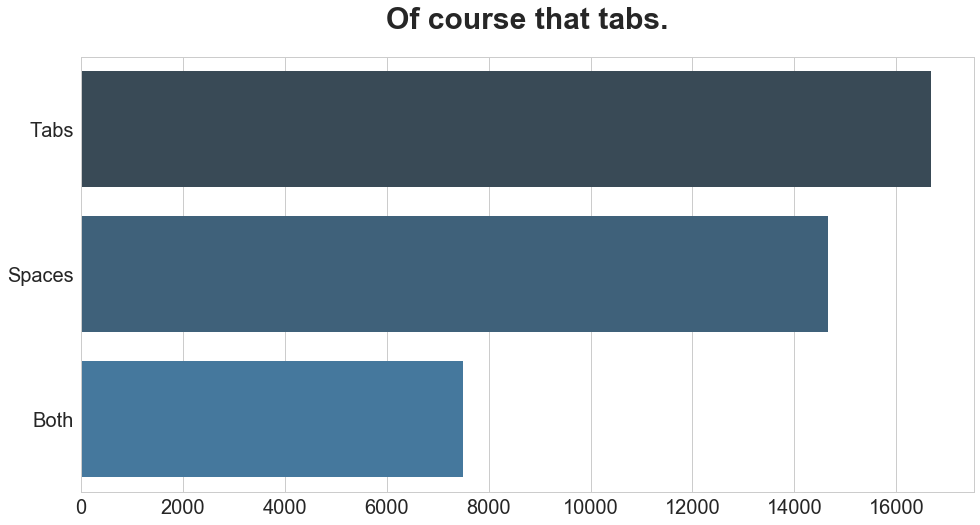

In [114]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Of course that tabs.', fontsize=30, fontweight='bold', y=1.05,)
sns.countplot(y="TabsSpaces", data=data, palette=sns.color_palette("Blues_d"));
plt.xlabel('', fontsize=15)
plt.ylabel('', fontsize=15)
plt.show()

### 3.3. Clicky, clicky?
<a id="clicky"></a>

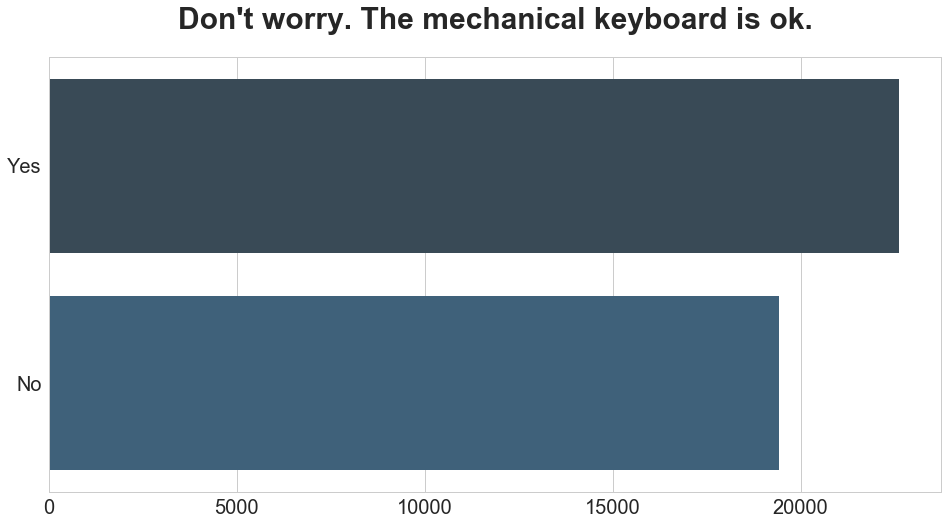

In [115]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title("Don't worry. The mechanical keyboard is ok.", fontsize=30, fontweight='bold', y=1.05,)
sns.countplot(y="ClickyKeys", data=data, palette=sns.color_palette("Blues_d"));
plt.xlabel('', fontsize=15)
plt.ylabel('', fontsize=15)
plt.show()

## 4. Less important questions
<a id="less_important_questions"></a>

### 4.1. What is the most popular programming language? 
<a id="programming_language"></a>

In [128]:
import operator
from collections import OrderedDict
languages = {}
for index, row in data.iterrows():
    if (row['HaveWorkedLanguage'] != None and type(row['HaveWorkedLanguage']) != float):
        languages_list = row['HaveWorkedLanguage'].split('; ')
        for lang in languages_list:
            if lang in languages.keys():
                languages[lang][0] += 1
            else:
                languages[lang] = [1,0]
                
    if (row['WantWorkLanguage'] != None and type(row['WantWorkLanguage']) != float):
        languages_list = row['WantWorkLanguage'].split('; ')
        for lang in languages_list:
            if lang in languages.keys():
                languages[lang][1] += 1
            else:
                languages[lang] = [0,1]
                
languages = OrderedDict(sorted(languages.items(), key=operator.itemgetter(1), reverse=True))

languages_names = list(languages.keys())
languages_know = [row[0] for row in list(languages.values())]
languages_learn = [row[1] for row in list(languages.values())]

In [146]:
trace1 = go.Bar(
    x = languages_names,
    y = languages_know,
    name='Most used',
    marker=dict(
        color='rgba(55, 128, 191, 0.7)',
        line=dict(
            color='rgba(55, 128, 191, 1.0)',
            width=2,
        )
    )
)
trace2 = go.Bar(
    x = languages_names,
    y = languages_learn,
    name='Most wanted',
    marker=dict(
        color='rgba(219, 64, 82, 0.7)',
        line=dict(
            color='rgba(219, 64, 82, 1.0)',
            width=2,
        )
    )
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group',
    title = 'Top languages in 2017',
    width=800,
    height=500,
     margin=go.Margin(
        l=75,
        r=20,
        b=130,
        t=80,
        pad=20
    ),
    paper_bgcolor='rgb(244, 238, 225)',
    plot_bgcolor='rgb(244, 238, 225)',
    yaxis = dict(
        title= 'Number of developers',
        anchor = 'x',
        rangemode='tozero'
    ),
    xaxis = dict(title= 'Languages'),
    legend=dict(x=0.70, y=0.45)
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)